In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from random_walk_builder import random_walk_builder, get_vector_chain_from_points, get_circle_thetas

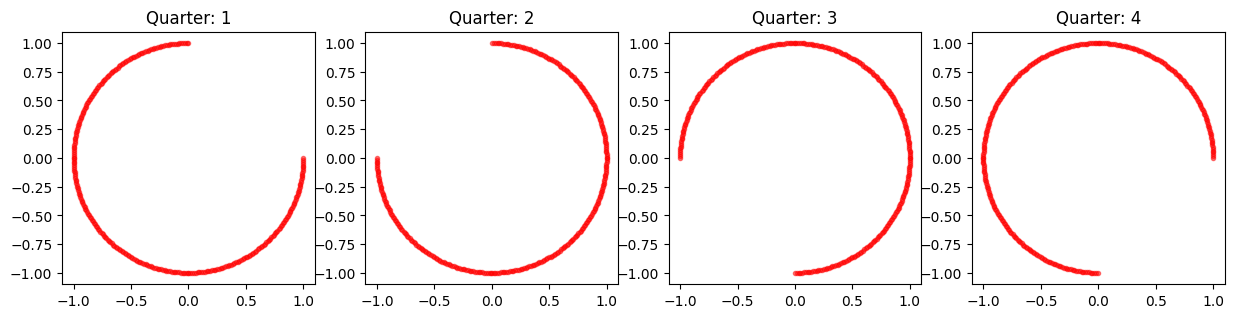

In [7]:
fig, ax = plt.subplots(1,4, figsize=(15,10))

for q_idx, q in enumerate(range(1, 5)):
    thetas = get_circle_thetas(q)
    ax[q_idx].plot(np.cos(thetas), np.sin(thetas), 'r.', alpha=.5)
    ax[q_idx].set_title('Quarter: %s' % q)
    ax[q_idx].axis('square')

plt.show()

In [8]:
CANVAS_W = 100
BORDERS = 50
CRITICAL_POINTS = [
    (0,0),
    (0, CANVAS_W),
    (CANVAS_W, 0),
    (CANVAS_W, CANVAS_W)
    ]
VECTOR_LEN = CANVAS_W * .125
VECTOR_LEN = CANVAS_W * .175
VECTOR_NUM = 9 * 7 # 7  is a color period. The rainbow repeats 9 times. Overal 63 vectors, 9 times of each color


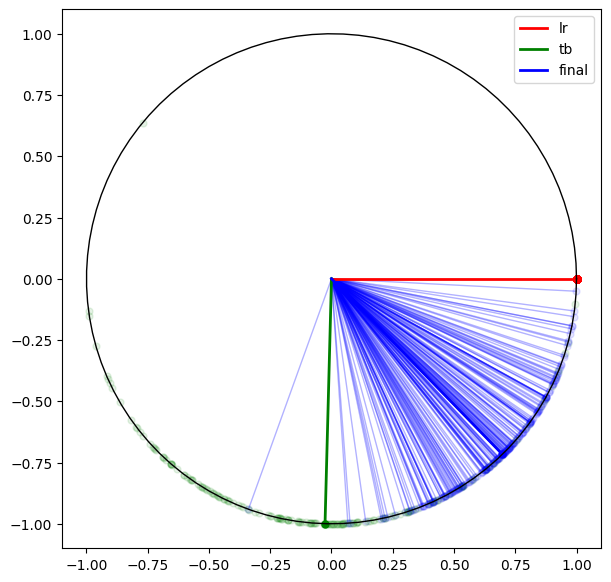

In [9]:
def proper_random_angle(cur_coord: list, max_x = CANVAS_W, max_y = CANVAS_W, num = 1):
    level_x = cur_coord[0] / max_x # measure of leftness / rightness
    level_y = cur_coord[1] / max_y # measure of bottomness / topness
    
    # this is main trend which should be balanced by opposite motion
    mu_scale_x = (0.5 - np.abs(0.5-level_x))*2
    mu_scale_y = (0.5 - np.abs(0.5-level_y))*2
    if level_x <= 0.5:
        left_right = np.random.randn(num)*np.pi*mu_scale_x
    else:
        left_right = np.random.randn(num)*np.pi*mu_scale_x+np.pi
    
    if level_y <= .5:
        top_bottom = np.random.randn(num)*np.pi*mu_scale_y + np.pi/2
    else:
        top_bottom = np.random.randn(num)*np.pi*mu_scale_y - np.pi/2
    
    final_angles = (top_bottom+left_right)/2
    
    return {'lr': left_right,
            'tb': top_bottom,
            'final': final_angles}

a = (0, 90)
angles_data = proper_random_angle(a, num=200)
angles = angles_data['final']

for angle in angles_data["lr"]:
    plt.plot(np.cos(angle), np.sin(angle), 'ro', alpha=.1, markersize=5)

for angle in angles_data["tb"]:
    plt.plot(np.cos(angle), np.sin(angle), 'go', alpha=.1, markersize=5)

for angle in angles_data["final"]:
    plt.plot([0,np.cos(angle)], [0,np.sin(angle)], 'b', alpha=.3, linewidth=1)
    plt.plot(np.cos(angle), np.sin(angle), 'bo', alpha=.1, markersize=5)



colors = ['r', 'g', 'b']
for data_idx, data in enumerate(angles_data):
    plt.plot([0, np.cos(np.average(angles_data[data]))], [0, np.sin(np.average(angles_data[data]))], '-', color=colors[data_idx], linewidth=2, label=f'{data}')
    plt.plot(np.cos(np.average(angles_data[data])),  np.sin(np.average(angles_data[data])), 'o', color=colors[data_idx], markersize=5)


thetas = np.linspace(0, 2*np.pi, 100)
x = np.cos(thetas)
y = np.sin(thetas)

plt.plot(x, y, '-k', linewidth=1)
plt.axis('square')
plt.legend()
plt.gcf().set_size_inches(7,7)
plt.show()

In [10]:
cur_coord = [0,0]
new_coord = [0,0]
angle_shift=0
colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']

for vector_idx in range(15):
    # print(f"Currently we are working on vector #{vector_idx} oo 10")
    random_angle = proper_random_angle(cur_coord)['final'][0] + angle_shift
        
    new_coord = new_coordinate(cur_coord, VECTOR_LEN, random_angle)
        
    plt.plot([cur_coord[0], new_coord[0]], [cur_coord[1], new_coord[1]], color = colors[vector_idx % len(colors)], linewidth=3)
    cur_coord = new_coord

plt.axis('square')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.gcf().set_size_inches(10,10)
plt.show()



NameError: name 'new_coordinate' is not defined

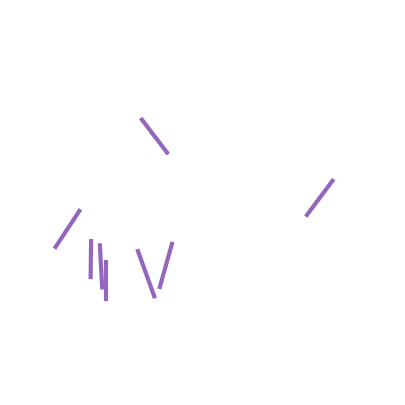

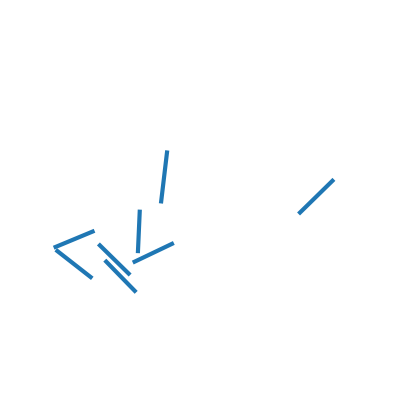

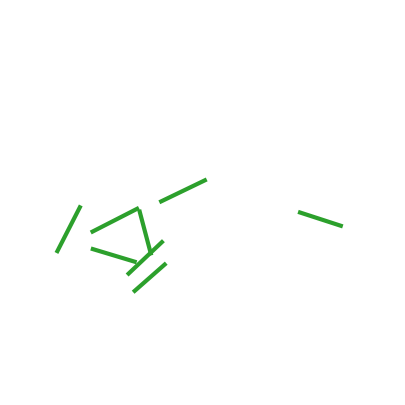

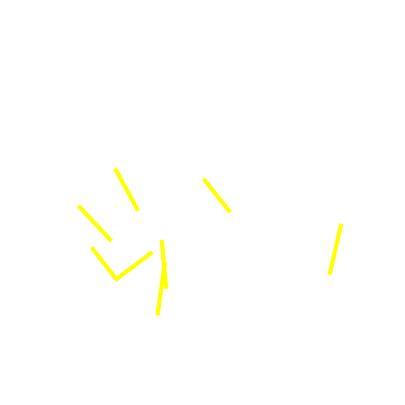

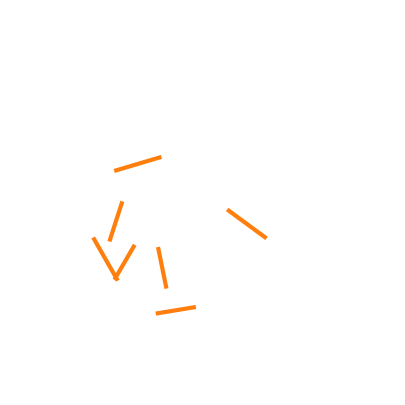

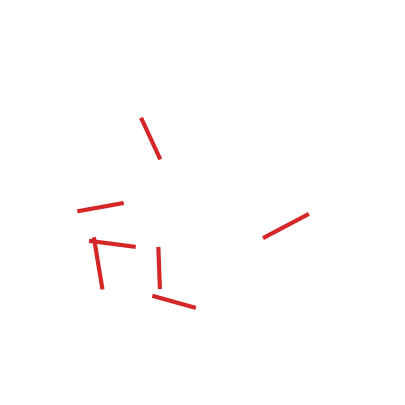

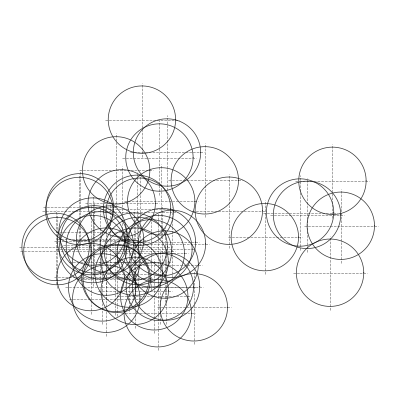

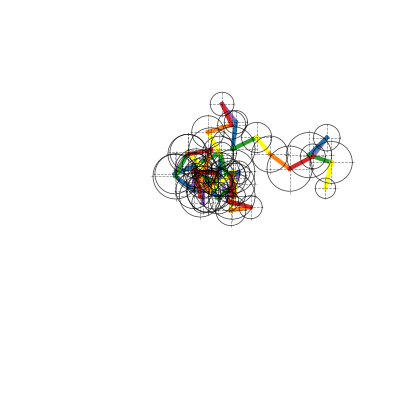

In [ ]:
coords = random_walk_builder(num_vectors=np.random.randint(40,60), vector_len=VECTOR_LEN, vector_len_mu=0.5)

x = [el[0] for el in coords]
y = [el[1] for el in coords]
colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']

theta_unit = np.linspace(0, 2*np.pi, 100)
now = datetime.utcnow()
now_f = now.strftime('%y%m%d_%H%M%S')
os.makedirs(now_f, exist_ok=True)
for color_idx, color in enumerate(colors):
    color_indexes = np.arange(color_idx, len(coords), len(colors))
    color_coords_x = [(coords[idx][0], coords[idx+1][0]) for idx in color_indexes if idx +1< len(coords)]
    color_coords_y = [(coords[idx][1], coords[idx+1][1]) for idx in color_indexes if idx +1 <len(coords)]
    for idx, color_coord in enumerate(color_coords_x):
        plt.plot(color_coords_x[idx], color_coords_y[idx], color = colors[color_idx], linewidth=3)
        
    plt.axis('square')
    plt.axis('off')
    plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
    plt.gcf().set_size_inches(7,5)
    plt.savefig(f'{now_f}/{color_idx}.svg', dpi=100)
    plt.show()


for idx, color_coord in enumerate(coords, start=1):
    plt.plot(np.cos(theta_unit)*VECTOR_LEN+x[idx-1], np.sin(theta_unit)*VECTOR_LEN+y[idx-1], 'k-', linewidth=.5, alpha=.8)
    plt.plot([x[idx-1]-VECTOR_LEN*1.1, x[idx-1]+VECTOR_LEN*1.1], [y[idx-1], y[idx-1]], 'k--', linewidth=.5, alpha=.5)
    plt.plot([x[idx-1], x[idx-1]], [y[idx-1]-VECTOR_LEN*1.1, y[idx-1]+VECTOR_LEN*1.1], 'k--', linewidth=.5, alpha=.5)

plt.axis('square')
plt.axis('off')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.gcf().set_size_inches(7,5)
plt.savefig(f'{now_f}/circles.svg', dpi=100)
plt.show()

fig, ax = plt.subplots()
for color_idx, color in enumerate(colors):
    color_indexes = np.arange(color_idx, len(coords), len(colors))
    color_coords_x = [(coords[idx][0], coords[idx+1][0]) for idx in color_indexes if idx +1< len(coords)]
    color_coords_y = [(coords[idx][1], coords[idx+1][1]) for idx in color_indexes if idx +1 <len(coords)]
    for idx, color_coord in enumerate(color_coords_x):
        plt.plot(color_coords_x[idx], color_coords_y[idx], color = colors[color_idx], linewidth=3)
    
for idx, color_coord in enumerate(coords, start=1):
    vector_len = np.random.rand()*VECTOR_LEN*0.75 + VECTOR_LEN*0.5
    plt.plot(np.cos(theta_unit)*vector_len+x[idx-1], np.sin(theta_unit)*vector_len+y[idx-1], 'k-', linewidth=.5, alpha=.8)
    plt.plot([x[idx-1]-vector_len*1.1, x[idx-1]+vector_len*1.1], [y[idx-1], y[idx-1]], 'k--', linewidth=.5, alpha=.5)
    plt.plot([x[idx-1], x[idx-1]], [y[idx-1]-vector_len*1.1, y[idx-1]+vector_len*1.1], 'k--', linewidth=.5, alpha=.5)

plt.axis('square')
plt.axis('off')
# print(ax.get_xlim(), ax.get_ylim())
lim = np.round(np.max([ax.get_xlim(), ax.get_ylim()]),0)
plt.axis([-lim, lim, -lim, lim])
plt.gcf().set_size_inches(7,5)
plt.savefig(f'{now_f}/full.svg', dpi=100)
plt.show()


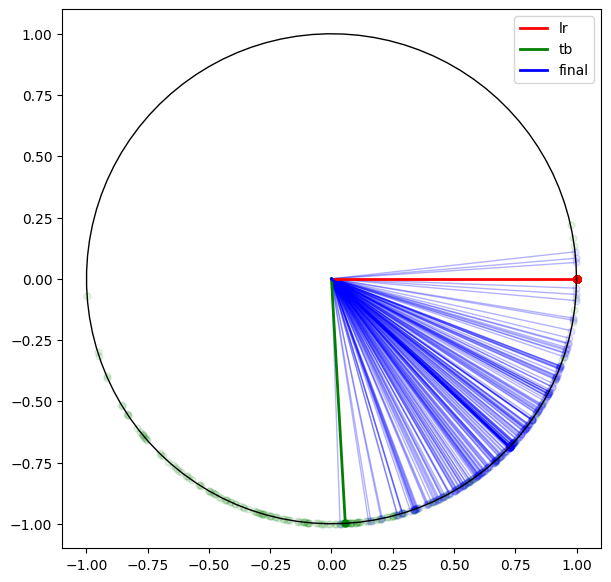

In [ ]:
a = (0, 90)
angles_data = proper_random_angle(a, num=200)
angles = angles_data['final']

for angle in angles_data["lr"]:
    plt.plot(np.cos(angle), np.sin(angle), 'ro', alpha=.1, markersize=5)

for angle in angles_data["tb"]:
    plt.plot(np.cos(angle), np.sin(angle), 'go', alpha=.1, markersize=5)

for angle in angles_data["final"]:
    plt.plot([0,np.cos(angle)], [0,np.sin(angle)], 'b', alpha=.3, linewidth=1)
    plt.plot(np.cos(angle), np.sin(angle), 'bo', alpha=.1, markersize=5)



colors = ['r', 'g', 'b']
for data_idx, data in enumerate(angles_data):
    plt.plot([0, np.cos(np.average(angles_data[data]))], [0, np.sin(np.average(angles_data[data]))], '-', color=colors[data_idx], linewidth=2, label=f'{data}')
    plt.plot(np.cos(np.average(angles_data[data])),  np.sin(np.average(angles_data[data])), 'o', color=colors[data_idx], markersize=5)


thetas = np.linspace(0, 2*np.pi, 100)
x = np.cos(thetas)
y = np.sin(thetas)

plt.plot(x, y, '-k', linewidth=1)
plt.axis('square')
plt.legend()
plt.gcf().set_size_inches(7,7)
plt.show()

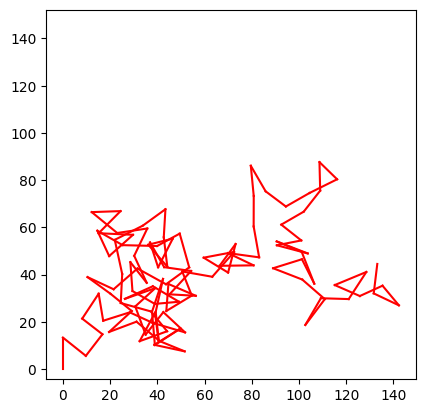

In [ ]:
colors = ['r', 'g', 'b']
for i in range(1):
    num_vectros = np.random.randint(80,120)
    coords = random_walk_builder(
        num_vectros,
        vector_len=VECTOR_LEN,
        vector_len_mu=0.5
    )

    chain = get_vector_chain_from_points(coords)
    for v in chain:
        a, b = v[0], v[1]
        plt.plot([a[0], b[0]], [a[1], b[1]], color=colors[i])
        radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)

plt.axis('square')
plt.show()


In [ ]:
CANVAS_W = 100
VECTOR_LEN = CANVAS_W * .01

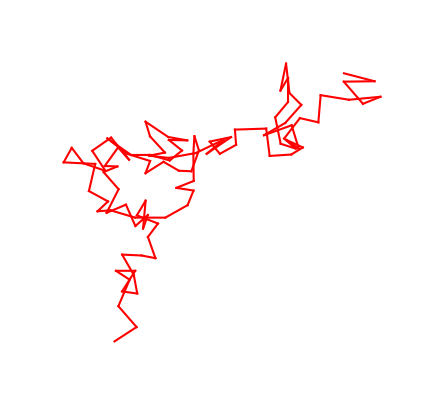

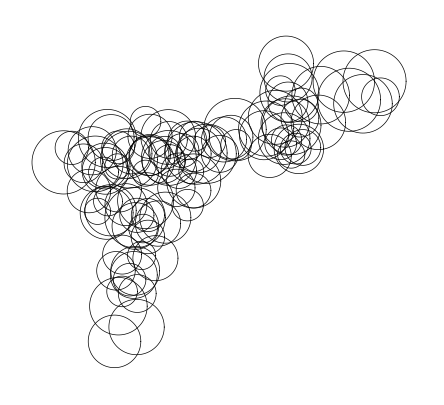

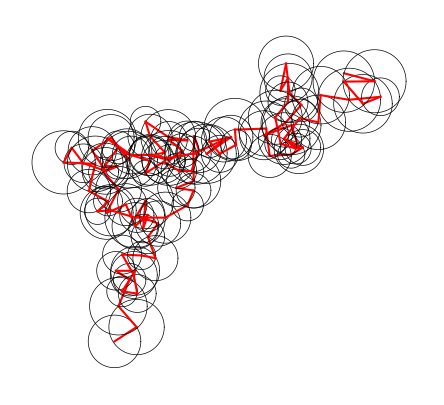

In [11]:
colors = ['r', 'g', 'b']
unit_thetas = np.linspace(0, 2*np.pi, 100)

for i in range(1):
    num_vectros = np.random.randint(80,120)
    coords = random_walk_builder(
        num_vectros,
        vector_len=10,
        vector_len_mu=2,
        max_x = 700,
        max_y = 500
    )
    max_x = np.max([el[0] for el in coords])+50
    min_x = np.min([el[0] for el in coords])-50
    max_y = np.max([el[1] for el in coords])+50
    min_y = np.min([el[1] for el in coords])-50

    chain = get_vector_chain_from_points(coords)
    for v in chain:
        a, b = v[0], v[1]
        plt.plot([a[0], b[0]], [a[1], b[1]], color=colors[i])
        
    plt.axis('off')
    plt.axis([min_x, max_x, min_y, max_y])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(7, 5)       
    plt.savefig(f'output/1-red.svg')
    plt.show()
    
    for v in chain:
        a, b = v[0], v[1]
        radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
        plt.plot(np.cos(unit_thetas)*radius+a[0], np.sin(unit_thetas)*radius+a[1], 'k', linewidth=0.5)
        
    plt.axis('off')
    plt.axis([min_x, max_x, min_y, max_y])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(7, 5)       
    plt.savefig('output/2-circles.svg')
    plt.show()
    
    for v in chain:
        a, b = v[0], v[1]
        plt.plot([a[0], b[0]], [a[1], b[1]], color=colors[i])
        radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
        plt.plot(np.cos(unit_thetas)*radius+a[0], np.sin(unit_thetas)*radius+a[1], 'k', linewidth=0.5)
        
    plt.axis('off')
    plt.axis([min_x, max_x, min_y, max_y])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(7, 5)       
    plt.savefig('output/full.svg')
    plt.show()



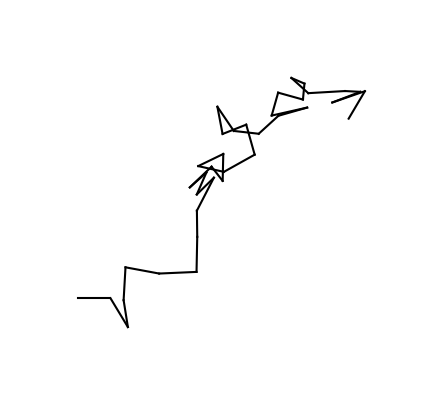

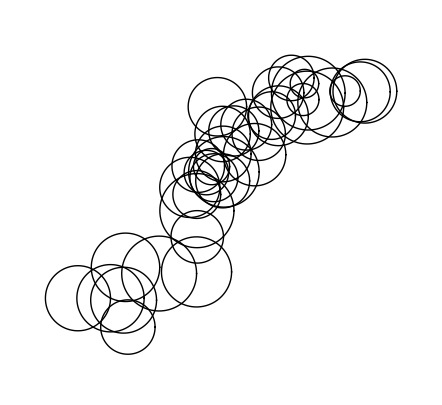

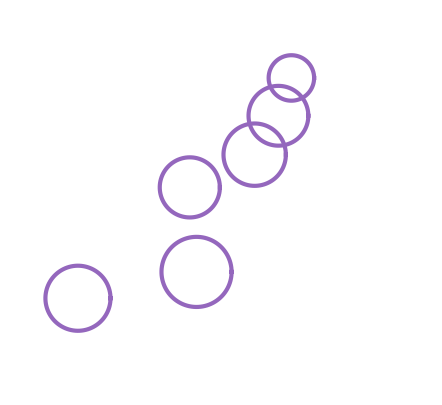

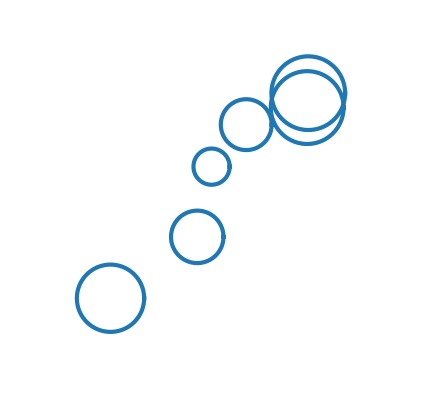

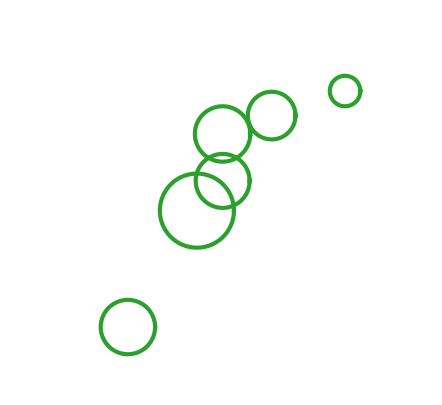

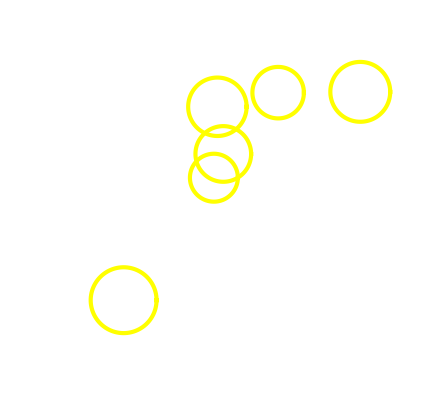

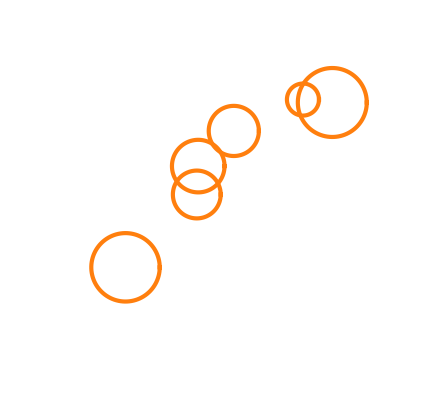

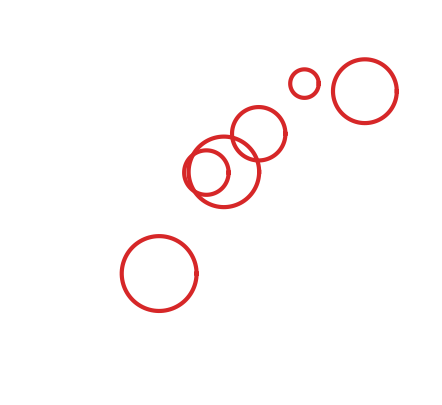

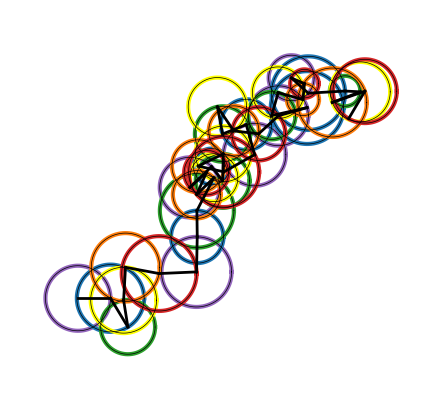

In [47]:
now = datetime.utcnow()
now_f = now.strftime('%y%m%d_%H%M%S')
out_path = f"output/{now_f}"
os.makedirs(out_path, exist_ok=True)

unit_thetas = np.linspace(0, 2*np.pi, 100)

for i in range(1):
    num_vectros = np.random.randint(12,49)
    coords = random_walk_builder(
        num_vectros,
        vector_len=10,
        vector_len_mu=2,
        max_x = 700,
        max_y = 500
    )
    max_x = np.max([el[0] for el in coords])+50
    min_x = np.min([el[0] for el in coords])-50
    max_y = np.max([el[1] for el in coords])+50
    min_y = np.min([el[1] for el in coords])-50

    chain = get_vector_chain_from_points(coords)
    for v in chain:
        a, b = v[0], v[1]
        plt.plot([a[0], b[0]], [a[1], b[1]], color='k')
        
    plt.axis('off')
    plt.axis([min_x, max_x, min_y, max_y])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(7, 5)       
    plt.savefig(f'{out_path}/1-radius.svg')
    plt.show()
    
    for v in chain:
        a, b = v[0], v[1]
        radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
        plt.plot(np.cos(unit_thetas)*radius+a[0], np.sin(unit_thetas)*radius+a[1], color='k', linewidth=1)
    
    plt.axis('off')
    plt.axis([min_x, max_x, min_y, max_y])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(7, 5)       
    plt.savefig(f'{out_path}/2-black_circles.svg')
    plt.show()

    colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']
    for color_idx, color in enumerate(colors):
        # print(f"Color_idx: {color_idx}, color {color}. Len: {len(colors)}")
        for v in chain[color_idx::len(colors)]:
            a, b = v[0], v[1]
            radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
            plt.plot(np.cos(unit_thetas)*radius+a[0], np.sin(unit_thetas)*radius+a[1], color=color, linewidth=3)
        
        plt.axis('off')
        plt.axis([min_x, max_x, min_y, max_y])
        plt.gca().set_aspect('equal')
        plt.gcf().set_size_inches(7, 5)       
        plt.savefig(f'{out_path}/{color_idx}_color_circles.svg')
        plt.show()


for color_idx, color in enumerate(colors):
    # print(f"Color_idx: {color_idx}, color {color}. Len: {len(colors)}")
    for v in chain[color_idx::len(colors)]:
        a, b = v[0], v[1]
        radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
        plt.plot(np.cos(unit_thetas)*radius+a[0], np.sin(unit_thetas)*radius+a[1], color=color, linewidth=3)

for v in chain:
    a, b = v[0], v[1]
    radius = np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
    plt.plot([a[0], b[0]], [a[1], b[1]], color='k', linewidth=2)
    plt.plot(np.cos(unit_thetas)*radius+a[0], np.sin(unit_thetas)*radius+a[1], color='k', linewidth=0.5)

plt.axis('off')
plt.axis([min_x, max_x, min_y, max_y])
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(7, 5)       
plt.savefig(f'{out_path}/full.svg')
plt.show()